In [1]:
import xarray as xr
import matplotlib
import numpy as np

In addition to `xarray`you would need to install `zarr`, `aiohttp` and `fsspec` to be able to directly work on datasets in the cloud. Otherwise you will see some error messages when executing the following command.

In [2]:
ds = xr.open_zarr("https://openstack.cebitec.uni-bielefeld.de:8080/swift/v1/DWDCube/cube_spatial.zarr/")
ds

/home/fohrmann/miniconda3/lib/python3.11/site-packages/xarray/conventions.py:431: SerializationWarning: variable 'hurs' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/home/fohrmann/miniconda3/lib/python3.11/site-packages/xarray/conventions.py:431: SerializationWarning: variable 'pr' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/home/fohrmann/miniconda3/lib/python3.11/site-packages/xarray/conventions.py:431: SerializationWarning: variable 'rsds' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/home/fohrmann/miniconda3/lib/python3.11/site-packages/xarray/conventions.py:431: SerializationWarning: variable 'tas' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


<xarray.Dataset>
Dimensions:                     (Time: 8766, rlat: 824, rlon: 848, vertices: 4)
Coordinates:
  * Time                        (Time) datetime64[ns] 1995-01-01 ... 2018-12-31
    height                      float64 ...
    latitude                    (rlat, rlon) float64 ...
    longitude                   (rlat, rlon) float64 ...
  * rlat                        (rlat) float64 -23.4 -23.35 ... 21.81 21.86
  * rlon                        (rlon) float64 -28.4 -28.35 ... 18.13 18.18
  * vertices                    (vertices) float64 1.0 2.0 3.0 4.0
Data variables:
    hurs                        (Time, rlat, rlon) float32 ...
    pr                          (Time, rlat, rlon) float32 ...
    rotated_latitude_longitude  float64 ...
    rsds                        (Time, rlat, rlon) float32 ...
    tas                         (Time, rlat, rlon) float32 ...
    vertices_latitude           (rlat, rlon, vertices) float64 ...
    vertices_longitude          (rlat, rlon, vertices) float64 ...
Attributes: (12/45)
    CDO:                            Climate Data Operators version 2.2.1 (htt...
    CORDEX_domain:                  EUR-6km
    Conventions:                    CF-1.7
    activity_id:                    COSMO-REA
    cmor_version:                   3.6.0
    contact:                        cdc.rea@dwd.de
    ...                             ...
    table_info:                     Creation Date:(27 Jan 2023) MD5:509fc5c33...
    title:                          COSMO-REA6 regional reanalysis data prepa...
    tracking_id:                    hdl:21.14103/2d8fab63-e5ec-4fef-838b-0ba9...
    variable_id:                    tas
    variant_info:                   Regional reanalysis forced by ERA-Interim.
    variant_label:                  r1i1p1f1

In [3]:
ds.tas

<xarray.DataArray 'tas' (Time: 8766, rlat: 824, rlon: 848)>
[6125260032 values with dtype=float32]
Coordinates:
  * Time       (Time) datetime64[ns] 1995-01-01 1995-01-02 ... 2018-12-31
    height     float64 ...
    latitude   (rlat, rlon) float64 ...
    longitude  (rlat, rlon) float64 ...
  * rlat       (rlat) float64 -23.4 -23.35 -23.29 -23.24 ... 21.75 21.81 21.86
  * rlon       (rlon) float64 -28.4 -28.35 -28.29 -28.24 ... 18.07 18.13 18.18
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    comment:        near-surface (usually, 2 meter) air temperature
    grid_mapping:   rotated_latitude_longitude
    history:        2023-06-30T10:58:24Z altered by CMOR: Treated scalar dime...
    long_name:      Near-Surface Air Temperature
    name:           tas
    original_name:  T2M
    standard_name:  air_temperature
    units:          K

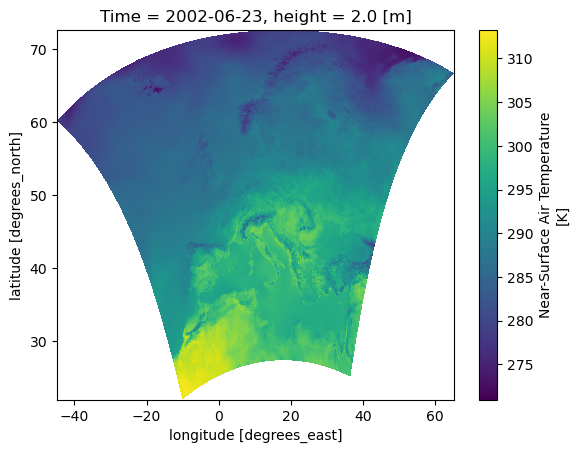

In [4]:
ds.tas.sel(Time="2002-06-23").plot(x='longitude',y='latitude')

In [5]:
dstime = xr.open_zarr("https://openstack.cebitec.uni-bielefeld.de:8080/swift/v1/DWDCube/cube_temporal.zarr/")

/home/fohrmann/miniconda3/lib/python3.11/site-packages/xarray/conventions.py:431: SerializationWarning: variable 'hurs' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/home/fohrmann/miniconda3/lib/python3.11/site-packages/xarray/conventions.py:431: SerializationWarning: variable 'pr' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/home/fohrmann/miniconda3/lib/python3.11/site-packages/xarray/conventions.py:431: SerializationWarning: variable 'rsds' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/home/fohrmann/miniconda3/lib/python3.11/site-packages/xarray/conventions.py:431: SerializationWarning: variable 'tas' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


In [6]:
def selectlonlat(a,lon,lat):
    idx = (np.abs(a.longitude - lon)+np.abs(a.latitude-lat)).argmin(dim=('rlon','rlat'))
    return a.isel(rlon=idx['rlon'].values,rlat=idx['rlat'].values)

In [7]:
lon = 10.5
lat = 55.2
dsoneloc = selectlonlat(dstime,lon,lat)
dsoneloc

<xarray.Dataset>
Dimensions:                     (Time: 8766, vertices: 4)
Coordinates:
  * Time                        (Time) datetime64[ns] 1995-01-01 ... 2018-12-31
    height                      float64 ...
    latitude                    float64 55.18
    longitude                   float64 10.46
    rlat                        float64 4.648
    rlon                        float64 -4.312
  * vertices                    (vertices) float64 1.0 2.0 3.0 4.0
Data variables:
    hurs                        (Time) float32 ...
    pr                          (Time) float32 ...
    rotated_latitude_longitude  float64 ...
    rsds                        (Time) float32 ...
    tas                         (Time) float32 ...
    vertices_latitude           (vertices) float64 ...
    vertices_longitude          (vertices) float64 ...
Attributes: (12/45)
    CDO:                            Climate Data Operators version 2.2.1 (htt...
    CORDEX_domain:                  EUR-6km
    Conventions:                    CF-1.7
    activity_id:                    COSMO-REA
    cmor_version:                   3.6.0
    contact:                        cdc.rea@dwd.de
    ...                             ...
    table_info:                     Creation Date:(27 Jan 2023) MD5:509fc5c33...
    title:                          COSMO-REA6 regional reanalysis data prepa...
    tracking_id:                    hdl:21.14103/2d8fab63-e5ec-4fef-838b-0ba9...
    variable_id:                    tas
    variant_info:                   Regional reanalysis forced by ERA-Interim.
    variant_label:                  r1i1p1f1

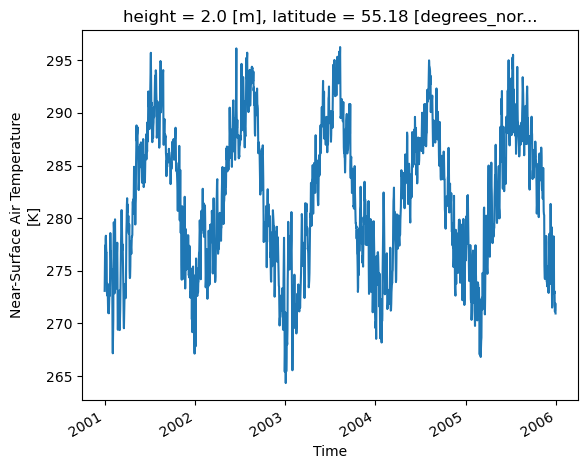

In [8]:
dsoneloc.tas.sel(Time=slice("2001-01-01","2005-12-31")).plot()